In [2]:
# Gereken kütüphaneleri yükleme
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri kümelerini okuma
tracks = pd.read_csv('../input/spotify-datasets/tracks.csv')
genre = pd.read_csv('../input/ultimate-spotify-tracks-db/SpotifyFeatures.csv')

# Spotify Parçaları Veri Seti Analizi
# Eksik değerleri kontrol etme
print("Parça veri setindeki eksik değerler:\n", tracks.isnull().sum())
print("Parça veri seti bilgileri:\n", tracks.info())


Parça veri setindeki eksik değerler:
 id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  ob

In [3]:
# Spotify parçalarının açıklamalı istatistikleri
print("Spotify parçalarının açıklamalı istatistikleri:\n", tracks.describe().transpose())

Spotify parçalarının açıklamalı istatistikleri:
                      count           mean            std     min          25%  \
popularity        586672.0      27.570053      18.370642     0.0      13.0000   
duration_ms       586672.0  230051.167286  126526.087418  3344.0  175093.0000   
explicit          586672.0       0.044086       0.205286     0.0       0.0000   
danceability      586672.0       0.563594       0.166103     0.0       0.4530   
energy            586672.0       0.542036       0.251923     0.0       0.3430   
key               586672.0       5.221603       3.519423     0.0       2.0000   
loudness          586672.0     -10.206067       5.089328   -60.0     -12.8910   
mode              586672.0       0.658797       0.474114     0.0       0.0000   
speechiness       586672.0       0.104864       0.179893     0.0       0.0340   
acousticness      586672.0       0.449863       0.348837     0.0       0.0969   
instrumentalness  586672.0       0.113451       0.266868    

In [4]:
# En popüler 10 şarkıyı bulma
en_populer = tracks.query('popularity > 90').nlargest(10, 'popularity')
print("En popüler 10 şarkı:\n", en_populer)


En popüler 10 şarkı:
                            id                                    name  \
93802  4iJyoBOLtHqaGxP12qzhQI  Peaches (feat. Daniel Caesar & Giveon)   
93803  7lPN2DXiMsVn7XUKtOW1CS                         drivers license   
93804  3Ofmpyhv5UAQ70mENzB277                  Astronaut In The Ocean   
92810  5QO79kh1waicV47BqGRL3g                         Save Your Tears   
92811  6tDDoYIxWvMLTdKpjFkc1B                               telepatía   
92813  0VjIjW4GlUZAMYd2vXMi3b                         Blinding Lights   
93805  7MAibcTli4IisCtbHKrGMh                     Leave The Door Open   
92814  6f3Slt0GbA2bPZlz0aIFXN                            The Business   
91866  60ynsPSSKe6O3sfwRnIBRf                                 Streets   
92816  3FAJ6O0NOHQV8Mc5Ri6ENp                  Heartbreak Anniversary   

       popularity  duration_ms  explicit  \
93802         100       198082         1   
93803          99       242014         1   
93804          98       132780         0  

In [5]:
# En az popüler 10 şarkıyı bulma
en_az_populer = tracks.nsmallest(10, 'popularity')
print("En az popüler 10 şarkı:\n", en_az_populer)


En az popüler 10 şarkı:
                         id                                 name  popularity  \
1   021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2   07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3   08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4   08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   
5   0BRXJHRNGQ3W4v9frnSfhu                            Ave Maria           0   
6   0Dd9ImXtAtGwsmsAD69KZT                       La Butte Rouge           0   
7   0IA0Hju8CAgYfV1hwhidBH                              La Java           0   
8   0IgI1UCz84pYeVetnl1lGP                   Old Fashioned Girl           0   
9   0JV4iqw2lSKJaHBQZ0e5zK        Martín Fierro - Remasterizado           0   
10  0OYGe21oScKJfanLyM7daU   Capítulo 2.8 - Banquero Anarquista           0   

    duration_ms  explicit              artists                  id_artists  \
1         98200         0  

In [6]:
# Endeksleri yayın tarihine göre değiştirme
tracks['yayin_tarihi'] = pd.to_datetime(tracks['release_date'])
tracks.set_index('yayin_tarihi', inplace=True)
print("Endeksleri yayın tarihine göre değiştirilmiş parçalar:\n", tracks.head())



Endeksleri yayın tarihine göre değiştirilmiş parçalar:
                                   id                                 name  \
yayin_tarihi                                                                
1922-02-22    35iwgR4jXetI318WEWsa1Q                                Carve   
1922-06-01    021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
1922-03-21    07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
1922-03-21    08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
1922-01-01    08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   

              popularity  duration_ms  explicit              artists  \
yayin_tarihi                                                           
1922-02-22             6       126903         0              ['Uli']   
1922-06-01             0        98200         0  ['Fernando Pessoa']   
1922-03-21             0       181640         0  ['Ignacio Corsini']   
1922-03-21             0       176907       

In [8]:
# Süreyi milisaniyeden saniyeye dönüştürme
tracks['sure'] = tracks['duration_ms'] // 1000
tracks.drop('duration_ms', inplace=True, axis=1)
print("Süre (saniye cinsinden):\n", tracks['sure'].head())


Süre (saniye cinsinden):
 yayin_tarihi
1922-02-22    126
1922-06-01     98
1922-03-21    181
1922-03-21    176
1922-01-01    163
Name: sure, dtype: int64


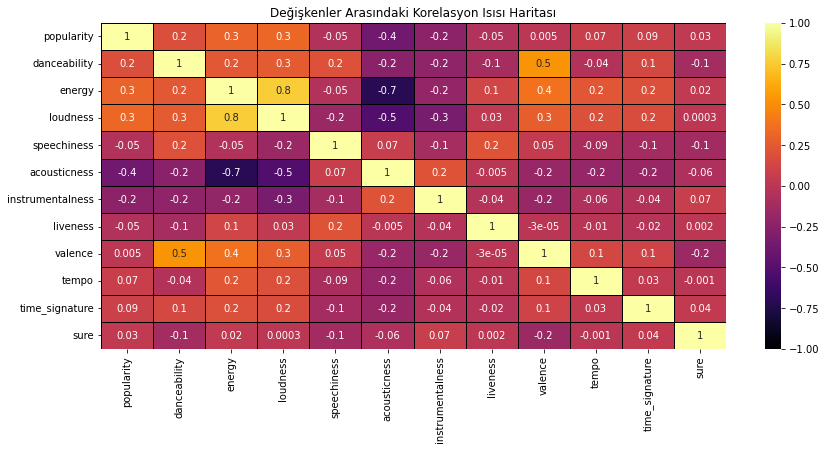

In [9]:
# Pearson korelasyon yöntemini kullanarak değişkenler arasındaki korelasyon ısısı haritası
cm = tracks.drop(['key','mode','explicit'], axis=1).corr(method='pearson')
plt.figure(figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
plt.title('Değişkenler Arasındaki Korelasyon Isısı Haritası')
plt.xticks(rotation=90)
plt.show()


In [10]:
# Rastgele örnekleme yaparak Regresyon çizimleri oluşturma
ornek = tracks.sample(frac=0.004)
print("Örneklem boyutu:", len(ornek))


Örneklem boyutu: 2347


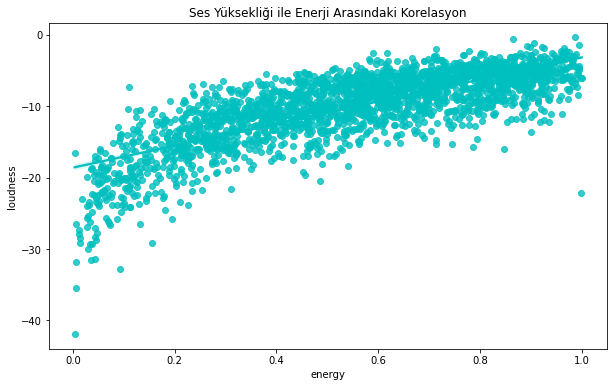

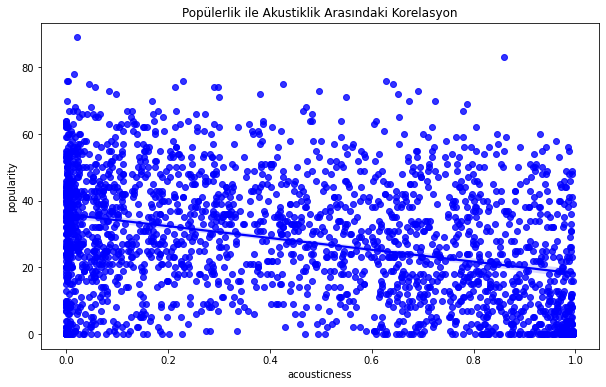

In [12]:
# Regresyon çizimi - Ses yüksekliği ile enerji arasındaki korelasyon
plt.figure(figsize=(10, 6))
sns.regplot(data=ornek, y='loudness', x='energy', color='c')
plt.title('Ses Yüksekliği ile Enerji Arasındaki Korelasyon')
plt.show()

# Regresyon çizimi - Popülerlik ile akustiklik arasındaki korelasyon
plt.figure(figsize=(10, 6))
sns.regplot(data=ornek, y='popularity', x='acousticness', color='b')
plt.title('Popülerlik ile Akustiklik Arasındaki Korelasyon')
plt.show()


In [ ]:
# Parçalara yeni bir sütun ekleme (Yıl, Yayın Tarihi)
tracks['yil'] = tracks.index.year

# Spotify'daki toplam şarkı sayısının 1992'den beri dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(data=tracks, x='yil', discrete=True, kde=True)
plt.title('1992\'den Beri Spotify\'daki Toplam Şarkı Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Şarkı Sayısı')
plt.show()


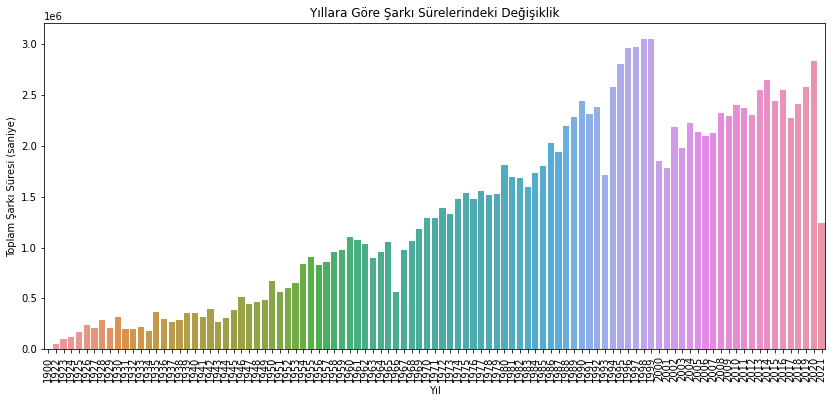

In [14]:
# Yıllara göre şarkı sürelerindeki değişiklik
plt.figure(figsize=(14, 6))
sns.barplot(data=tracks, x='yil', y='sure', estimator=sum, ci=None)
plt.title('Yıllara Göre Şarkı Sürelerindeki Değişiklik')
plt.xlabel('Yıl')
plt.ylabel('Toplam Şarkı Süresi (saniye)')
plt.xticks(rotation=90)
plt.show()



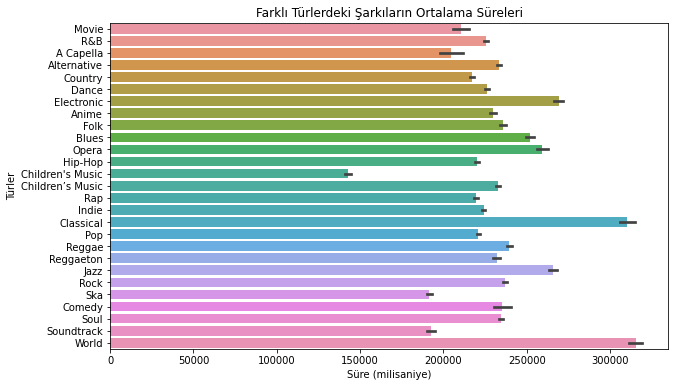

In [15]:
# Spotify Özellikler Veri Seti Analizi
# Farklı Türlerdeki Şarkıların Süreleri
plt.figure(figsize=(10, 6))
sns.barplot(data=genre, y='genre', x='duration_ms', estimator=np.mean)
plt.title('Farklı Türlerdeki Şarkıların Ortalama Süreleri')
plt.xlabel('Süre (milisaniye)')
plt.ylabel('Türler')
plt.show()



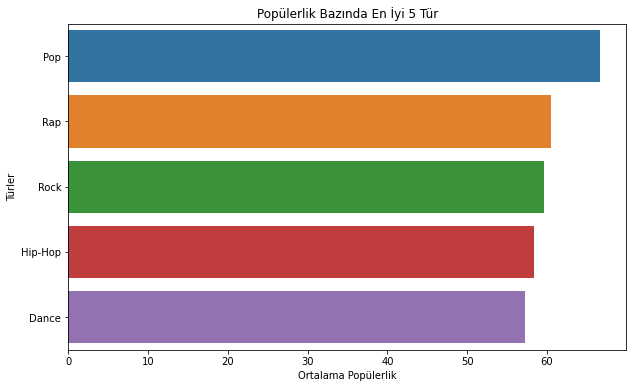

In [16]:
# Popülerlik Bazında En İyi 5 Tür
en_iyi_turler = genre.groupby('genre')['popularity'].mean().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(y=en_iyi_turler.index, x=en_iyi_turler.values)
plt.title('Popülerlik Bazında En İyi 5 Tür')
plt.xlabel('Ortalama Popülerlik')
plt.ylabel('Türler')
plt.show()

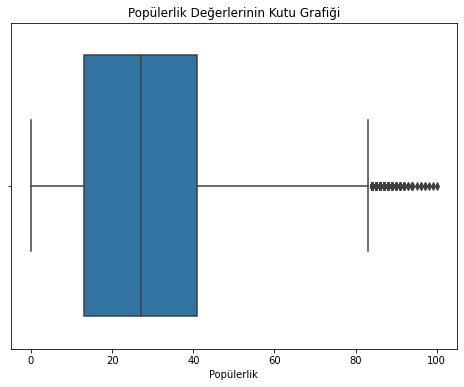

Popülerlik özelliği için aykırı değerlerin sayısı: 326


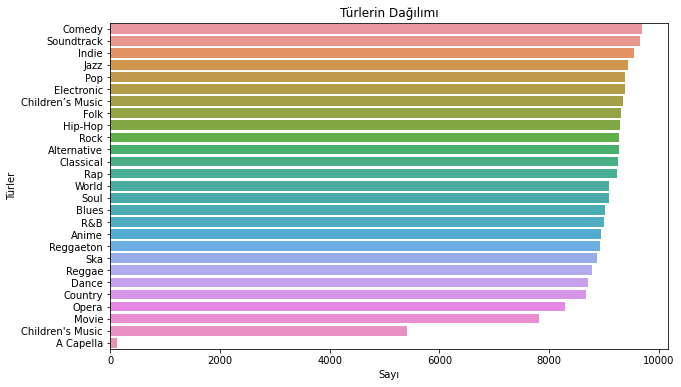

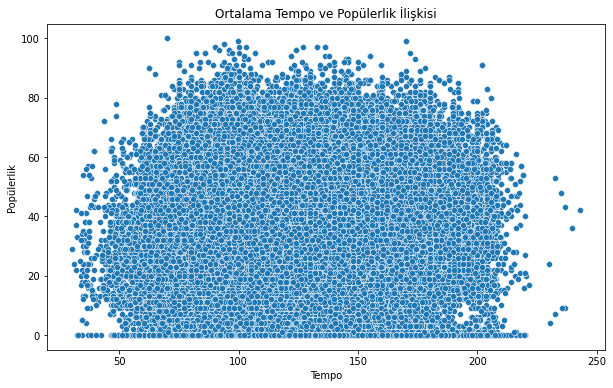

In [17]:
# Aykırı değer tespiti ve EDA

# Spotify Parçaları Veri Seti için Aykırı Değerler
# Popülerlik özelliğindeki aykırı değerlerin kutu grafiği
plt.figure(figsize=(8, 6))
sns.boxplot(x=tracks['popularity'])
plt.title('Popülerlik Değerlerinin Kutu Grafiği')
plt.xlabel('Popülerlik')
plt.show()

# Popülerlik özelliğinin aykırı değerlerini belirleme
q1 = tracks['popularity'].quantile(0.25)
q3 = tracks['popularity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Aykırı değerlerin sayısını hesaplama
outliers = tracks[(tracks['popularity'] < lower_bound) | (tracks['popularity'] > upper_bound)]
print("Popülerlik özelliği için aykırı değerlerin sayısı:", len(outliers))

# Genre Veri Seti için Aykırı Değerler
# EDA - Genre Veri Seti
# Türlerin dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(data=genre, y='genre', order=genre['genre'].value_counts().index)
plt.title('Türlerin Dağılımı')
plt.xlabel('Sayı')
plt.ylabel('Türler')
plt.show()

# Ortalama tempo ve popülerlik ilişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=genre, x='tempo', y='popularity')
plt.title('Ortalama Tempo ve Popülerlik İlişkisi')
plt.xlabel('Tempo')
plt.ylabel('Popülerlik')
plt.show()
